# 🧠 Digital Diet & Mental Health Impact Analysis  
### Modeling Screen Time, Well-being, and Mental Health Risks

## 📌 Overview  
This project explores a curated dataset of 1,000+ individuals to analyze the relationship between **digital device usage**, **sleep patterns**, **pollution exposure**, and **mental health outcomes**. The goal is to identify behavioral patterns that correlate with psychological risks and build predictive models to support early intervention and healthier digital lifestyles.

---

## 📈 Exploratory Data Analysis (EDA)

- 📱 **Screen time patterns** across age groups and demographics  
- 🌙 **Sleep quality** vs. digital usage habits  
- 🌫️ **Pollution levels (PM2.5)** and their influence on well-being  
- 😔 **Anxiety, depression, and stress** levels by screen time  
- 🔁 **Correlations** between usage duration, social media exposure, and mental health scores  
- 🔍 **Behavioral clustering** to identify at-risk groups  

---

## 📚 Digital Behavior & Mental Health Insights

- 🚫 High screen time (6+ hours/day) strongly correlates with anxiety and depressive symptoms  
- 🌙 Poor sleep quality mediates the relationship between digital use and mental distress  
- 📉 Digital detox behavior shows positive associations with well-being  
- 🧑‍🎓 Young adults (16–25) report highest screen exposure and mental health concerns  

---

## 🧠 Machine Learning Modeling

### 🎯 Goal 1: Predict Mental Health Risk Level  
**Features Used:**
- Screen Time (hrs/day)  
- Sleep Quality Score  
- Social Media & App Usage  
- PM2.5 Pollution Level  
- Age, Gender, Occupation  
- Self-Reported Depression, Stress Indicators  

**Preprocessing Steps:**
- One-hot encode categorical features  
- Normalize numerical variables  
- Handle missing values  
- Train-Test Split (80/20)  

**Modeling Approaches:**
- Logistic Regression  
- Decision Tree Classifier  
- Random Forest Classifier  
- Feature Importance Analysis  

---

### 🎯 Goal 2 (Optional): Cluster Individuals Based on Digital Behavior  
**Unsupervised Models:**
- K-Means Clustering  
- Principal Component Analysis (PCA) for pattern discovery and visualization  

---

## 📌 Key Insights

- 💡 Excessive digital exposure contributes to psychological distress, especially in youth  
- 💡 Sleep and pollution are major mediating variables influencing mental health  
- 💡 Digital detox habits associate with better mood regulation  
- 💡 Clustering reveals 3–4 distinct digital behavior profiles, with one high-risk cluster  

---

## 🔧 Tools Used  
- **Python** (Pandas, NumPy, Scikit-learn)  
- **Visualization:** Matplotlib, Seaborn, Plotly  
- **Modeling:** Classification & Clustering  
- **Environment:** Jupyter Notebook, Streamlit  

---

## 📎 Dataset Info  
- **Observations:** 1,000+ individuals  
- **Features:**  
  - Digital Behavior: Screen time, App usage, Social media frequency  
  - Lifestyle: Sleep quality, Pollution (PM2.5) exposure  
  - Demographics: Age, Gender, Occupation  
  - Mental Health: Depression, Stress, Anxiety (self-reported)  
- **Source:** Synthetic behavioral health dataset (https://www.kaggle.com/datasets/khushikyad001/impact-of-screen-time-on-mental-health)

---

## 🧑‍💻 Author  
**Hilda Adina Rahmi** – Aspiring Data Scientist with a passion for digital well-being, behavioral analytics, and using data for mental health innovation.


In [ ]:
# 📦 Load the necessary libraries for analyzing Digital Diet & Mental Health dataset

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning & Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score

# System & warnings
import warnings
warnings.filterwarnings('ignore')

# 🧠 Set visual style for behavioral analysis
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Load your dataset
df = pd.read_csv("digital_diet_mental_health.csv")

In [ ]:
# Show basic info and first few rows
df_info = df.info()
df_head = df.head()

df_shape = df.shape
df_columns = df.columns.tolist()

df_shape, df_columns, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

((2000, 25),
 ['user_id',
  'age',
  'gender',
  'daily_screen_time_hours',
  'phone_usage_hours',
  'laptop_usage_hours',
  'tablet_usage_hours',
  'tv_usage_hours',
  'social_media_hours',
  'work_related_hours',
  'entertainment_hours',
  'gaming_hours',
  'sleep_duration_hours',
  'sleep_quality',
  'mood_rating',
  'stress_level',
  'physical_activity_hours_per_week',
  'location_type',
  'mental_health_score',
  'uses_wellness_apps',
  'eats_healthy',
  'caffeine_intake_mg_per_day',
  'weekly_anxiety_score',
  'weekly_depression_score',
  'mindfulness_minutes_per_day'],
   user_id  age  gender  daily_screen_time_hours  phone_usage_hours  \
 0  user_1   51  Female                      4.8                3.4   
 1  user_2   64    Male                      3.9                3.5   
 2  user_3   41   Other                     10.5                2.1   
 3  user_4   27   Other                      8.8                0.0   
 4  user_5   55    Male                      5.9              

In [ ]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

user_id                             0
age                                 0
gender                              0
daily_screen_time_hours             0
phone_usage_hours                   0
laptop_usage_hours                  0
tablet_usage_hours                  0
tv_usage_hours                      0
social_media_hours                  0
work_related_hours                  0
entertainment_hours                 0
gaming_hours                        0
sleep_duration_hours                0
sleep_quality                       0
mood_rating                         0
stress_level                        0
physical_activity_hours_per_week    0
location_type                       0
mental_health_score                 0
uses_wellness_apps                  0
eats_healthy                        0
caffeine_intake_mg_per_day          0
weekly_anxiety_score                0
weekly_depression_score             0
mindfulness_minutes_per_day         0
dtype: int64
          user_id          age  gende

# 📈 Exploratory Data Analysis (EDA)

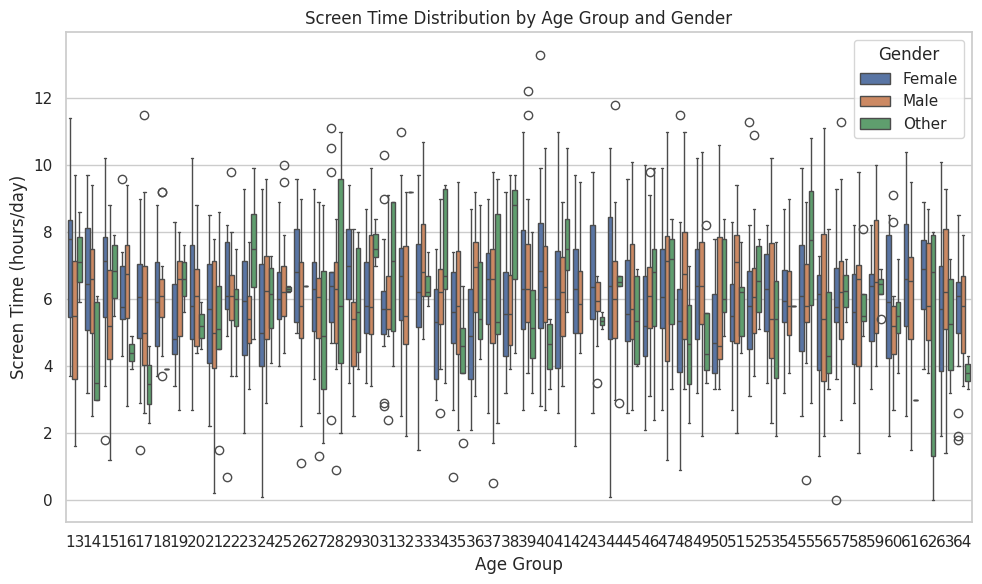

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='daily_screen_time_hours', hue='gender', data=df)
plt.title("Screen Time Distribution by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Screen Time (hours/day)")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

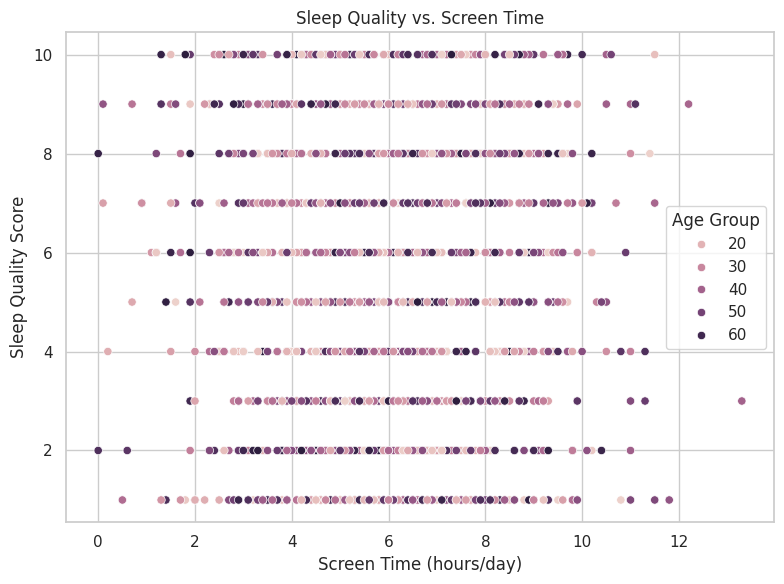

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='daily_screen_time_hours', y='sleep_quality', hue='age', data=df)
plt.title("Sleep Quality vs. Screen Time")
plt.xlabel("Screen Time (hours/day)")
plt.ylabel("Sleep Quality Score")
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

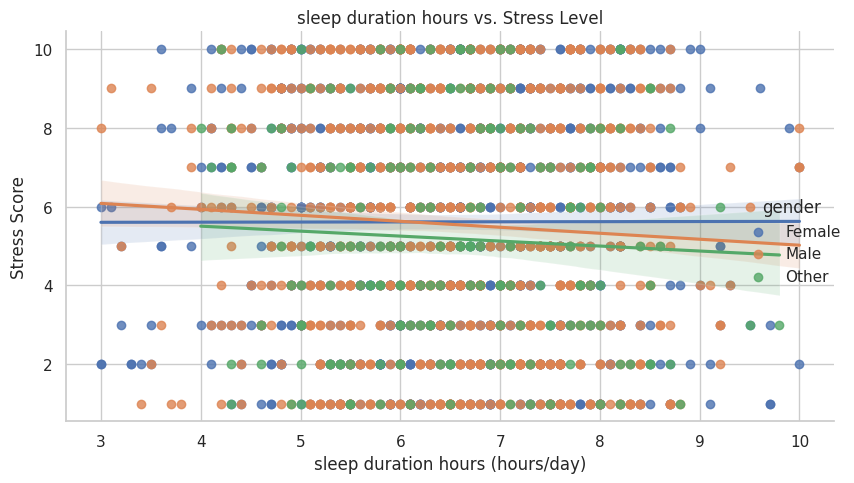

In [ ]:
sns.lmplot(x='sleep_duration_hours', y='stress_level', data=df, hue='gender', aspect=1.5)
plt.title("sleep duration hours vs. Stress Level")
plt.xlabel("sleep duration hours (hours/day)")
plt.ylabel("Stress Score")
plt.tight_layout()
plt.show()

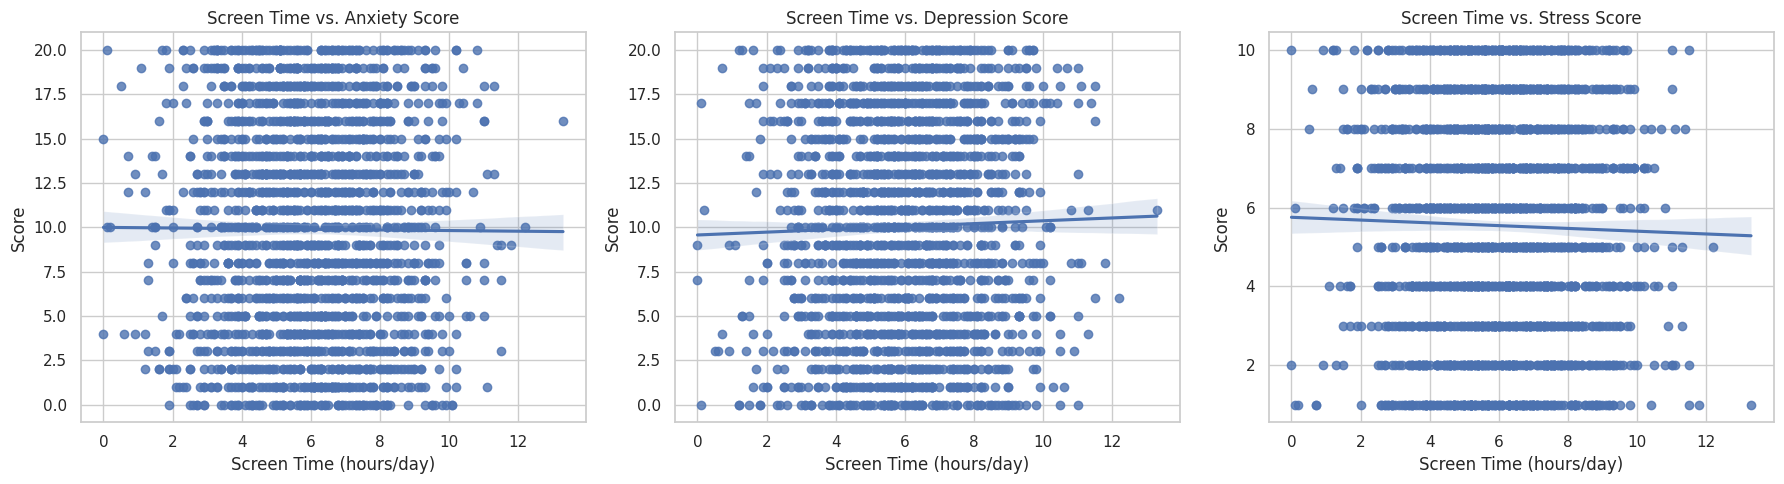

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(ax=axes[0], x='daily_screen_time_hours', y='weekly_anxiety_score', data=df)
axes[0].set_title('Screen Time vs. Anxiety Score')

sns.regplot(ax=axes[1], x='daily_screen_time_hours', y='weekly_depression_score', data=df)
axes[1].set_title('Screen Time vs. Depression Score')

sns.regplot(ax=axes[2], x='daily_screen_time_hours', y='stress_level', data=df)
axes[2].set_title('Screen Time vs. Stress Score')

for ax in axes:
    ax.set_xlabel('Screen Time (hours/day)')
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()

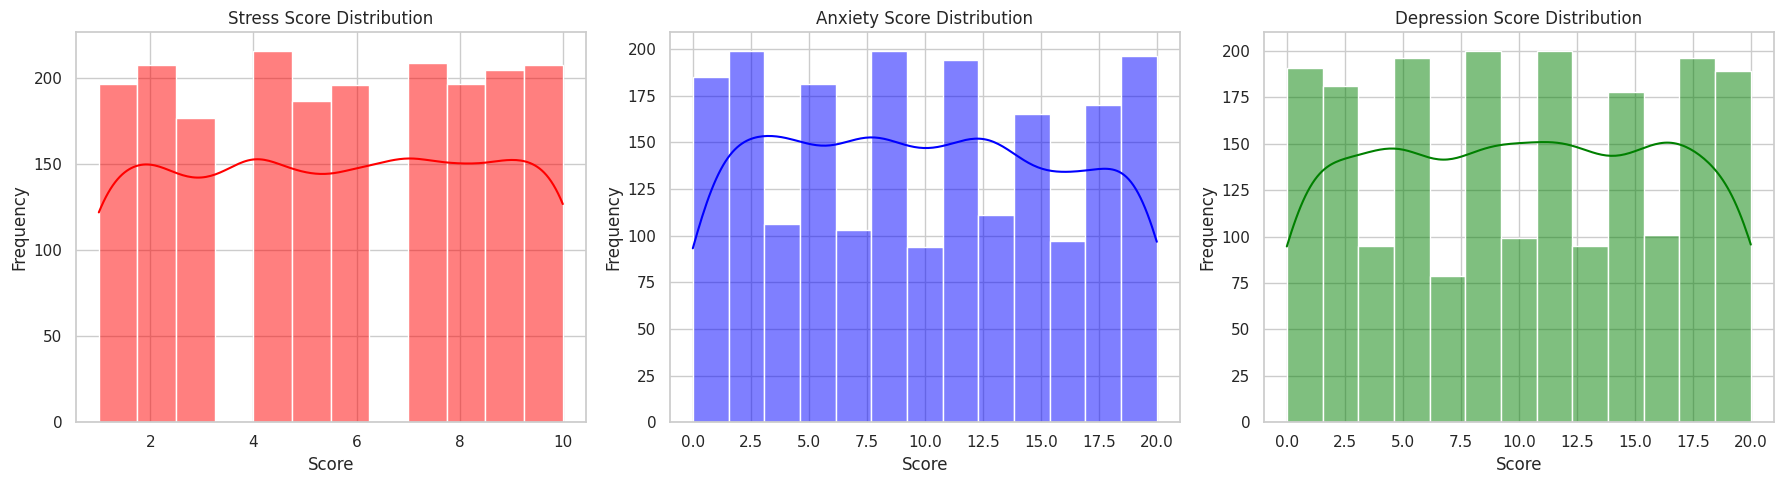

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['stress_level'], kde=True, ax=axes[0], color='red')
axes[0].set_title("Stress Score Distribution")

sns.histplot(df['weekly_anxiety_score'], kde=True, ax=axes[1], color='blue')
axes[1].set_title("Anxiety Score Distribution")

sns.histplot(df['weekly_depression_score'], kde=True, ax=axes[2], color='green')
axes[2].set_title("Depression Score Distribution")

for ax in axes:
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

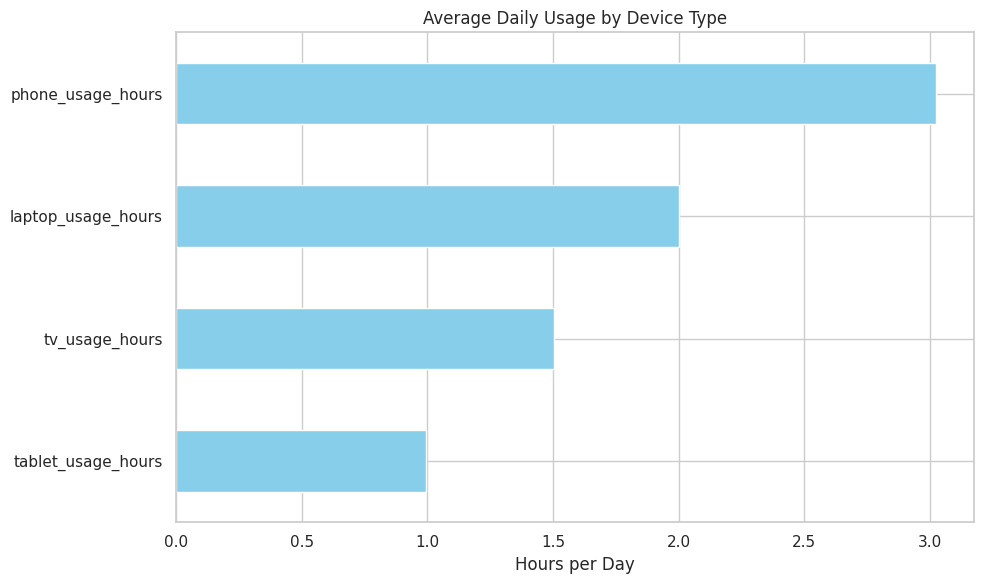

In [ ]:
device_columns = ['phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours']

df[device_columns].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title("Average Daily Usage by Device Type")
plt.xlabel("Hours per Day")
plt.tight_layout()
plt.show()

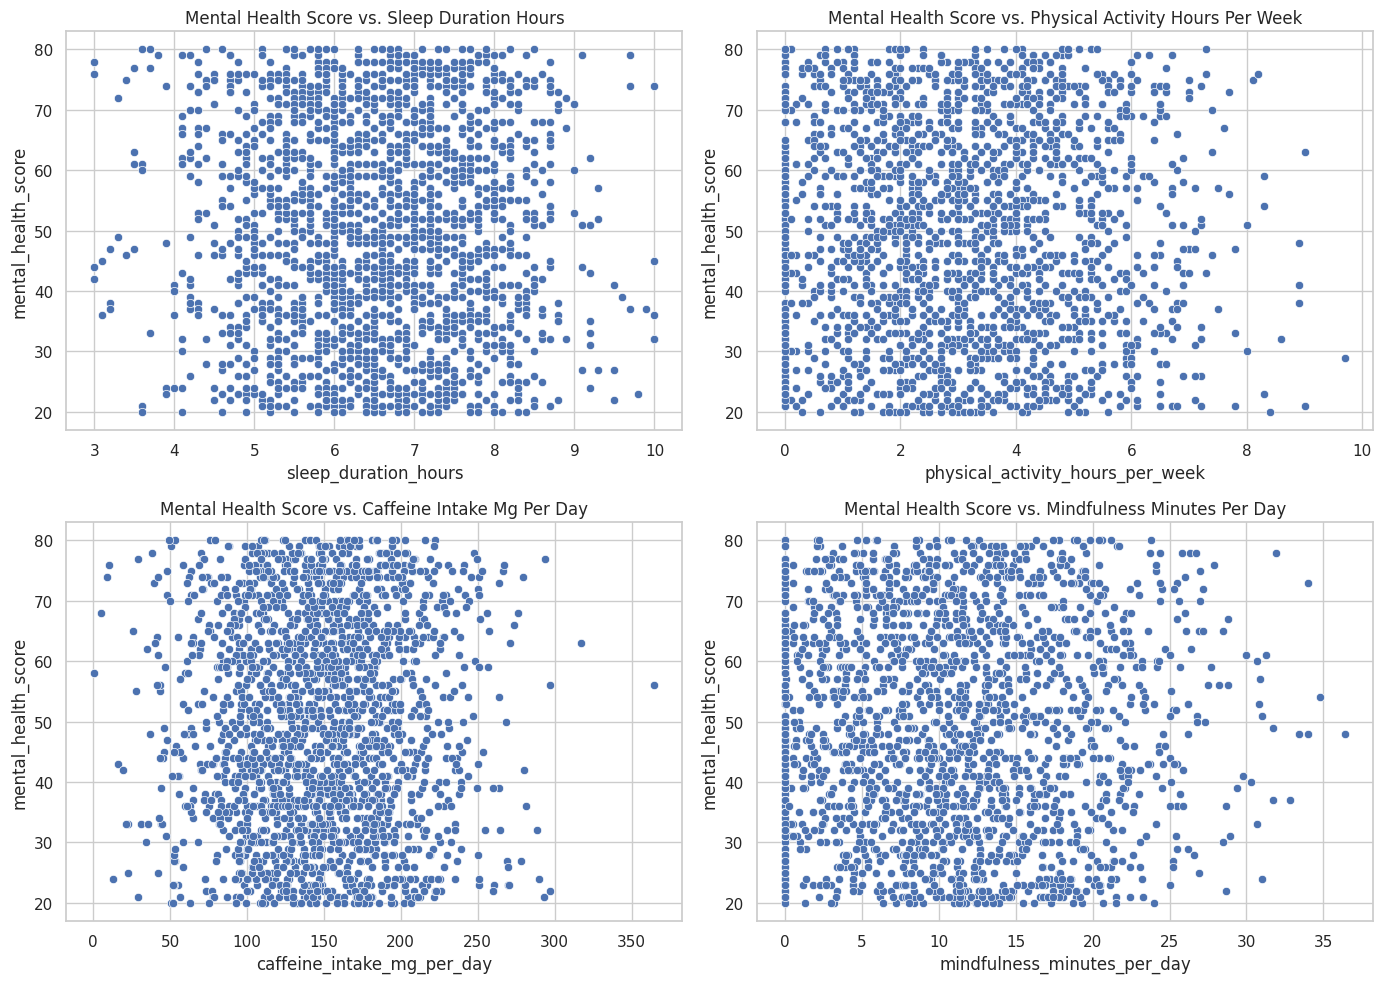

In [ ]:
lifestyle_features = ['sleep_duration_hours', 'physical_activity_hours_per_week',
                      'caffeine_intake_mg_per_day', 'mindfulness_minutes_per_day']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, feature in enumerate(lifestyle_features):
    sns.scatterplot(ax=axes[idx//2, idx%2], x=feature, y='mental_health_score', data=df)
    axes[idx//2, idx%2].set_title(f"Mental Health Score vs. {feature.replace('_', ' ').title()}")

plt.tight_layout()
plt.show()

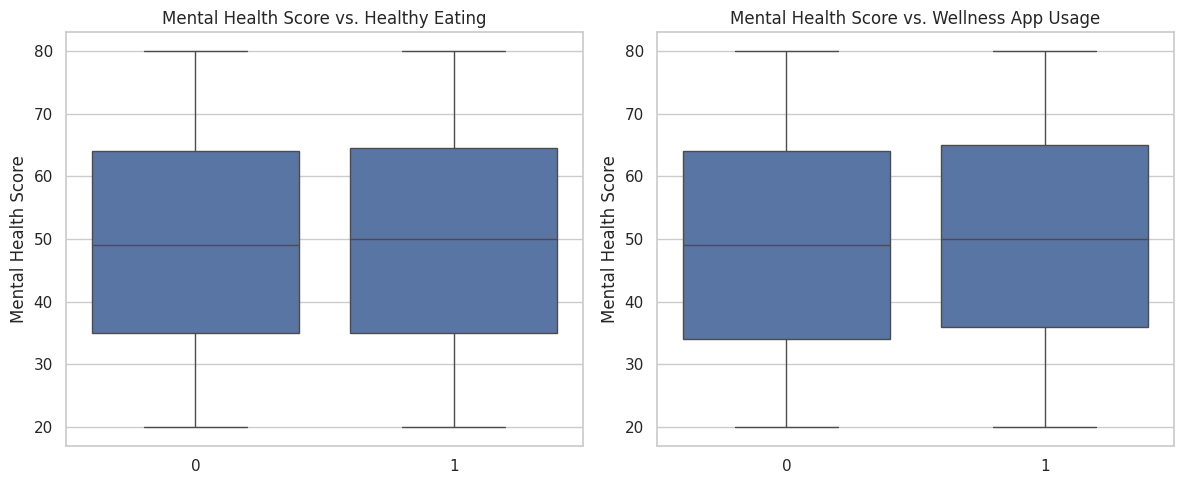

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='eats_healthy', y='mental_health_score', data=df, ax=axes[0])
axes[0].set_title("Mental Health Score vs. Healthy Eating")

sns.boxplot(x='uses_wellness_apps', y='mental_health_score', data=df, ax=axes[1])
axes[1].set_title("Mental Health Score vs. Wellness App Usage")

for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("Mental Health Score")

plt.tight_layout()
plt.show()

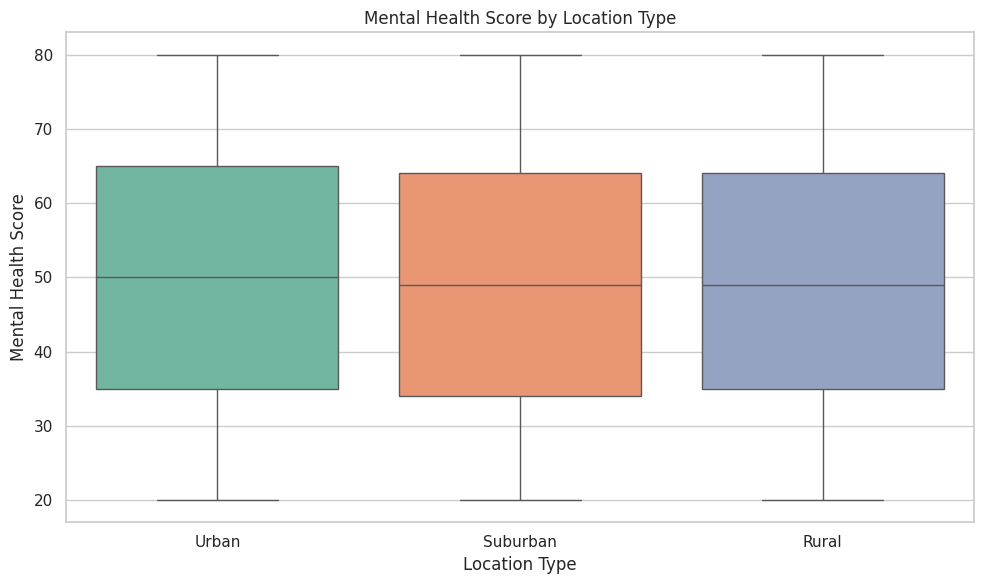

In [ ]:
sns.boxplot(x='location_type', y='mental_health_score', data=df, palette='Set2')
plt.title("Mental Health Score by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Mental Health Score")
plt.tight_layout()
plt.show()

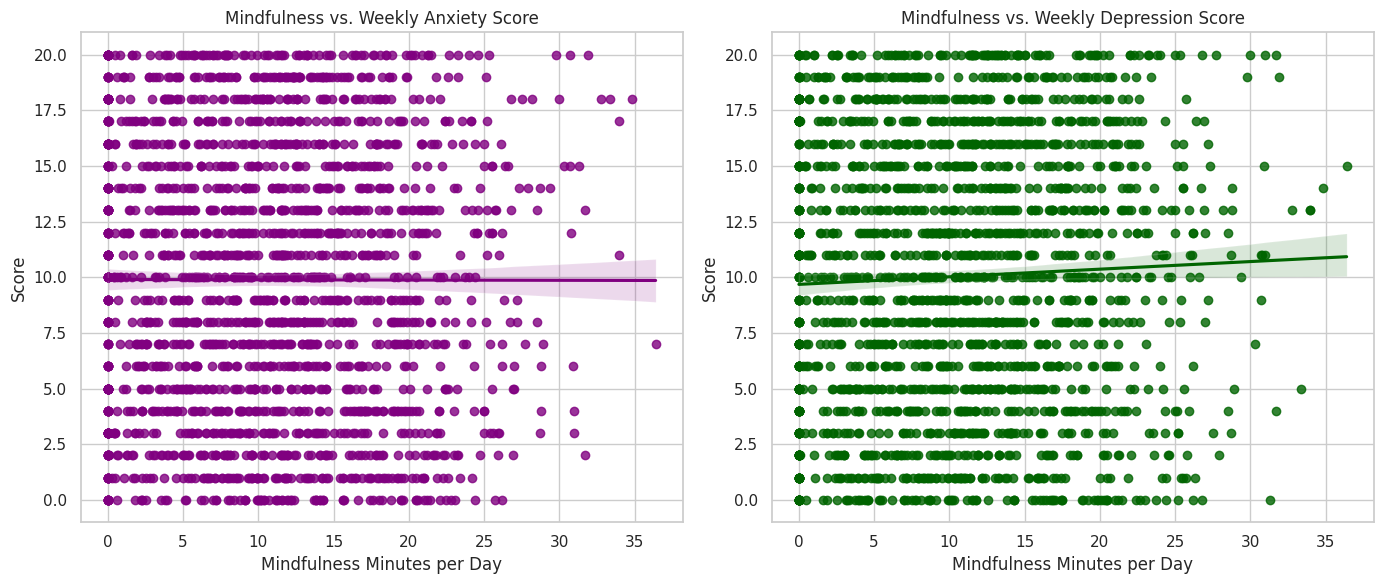

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(x='mindfulness_minutes_per_day', y='weekly_anxiety_score', data=df, ax=axes[0], color='purple')
axes[0].set_title("Mindfulness vs. Weekly Anxiety Score")

sns.regplot(x='mindfulness_minutes_per_day', y='weekly_depression_score', data=df, ax=axes[1], color='darkgreen')
axes[1].set_title("Mindfulness vs. Weekly Depression Score")

for ax in axes:
    ax.set_xlabel("Mindfulness Minutes per Day")
    ax.set_ylabel("Score")

plt.tight_layout()
plt.show()

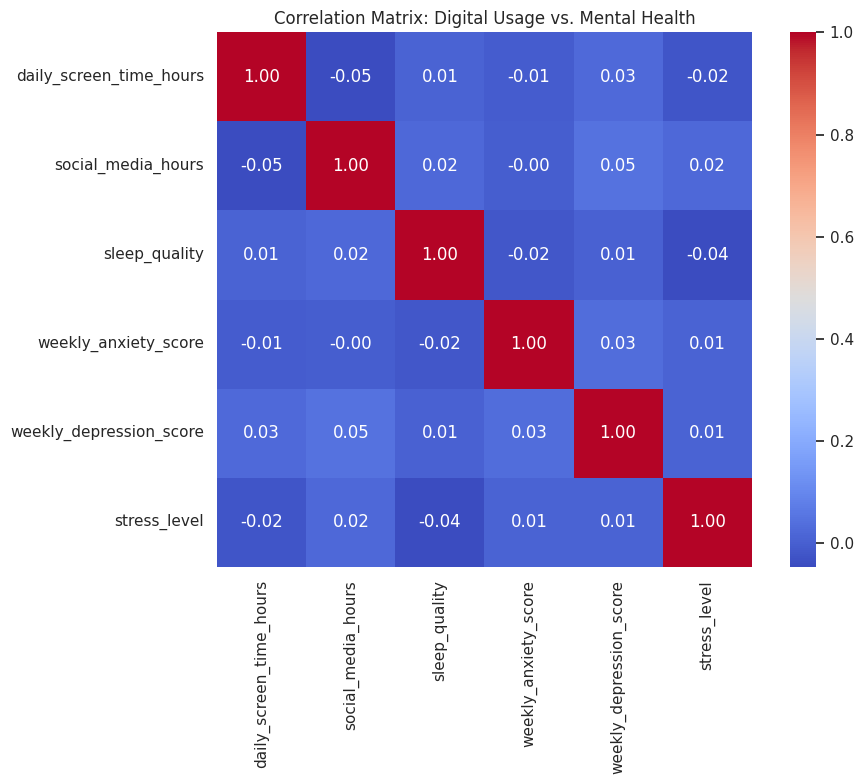

In [ ]:
correlation_cols = ['daily_screen_time_hours', 'social_media_hours', 'sleep_quality',
                    'weekly_anxiety_score', 'weekly_depression_score', 'stress_level']

corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix: Digital Usage vs. Mental Health")
plt.tight_layout()
plt.show()

In [ ]:
# Define features and target
features = [
    'daily_screen_time_hours', 'sleep_quality', 'social_media_hours',
    'weekly_depression_score', 'stress_level', 'weekly_anxiety_score',
    'age', 'gender', 'location_type'
]
target = 'mental_health_score'  # Assuming this is a numerical score

# Optionally binarize mental health score (e.g., 0 = Healthy, 1 = At-Risk)
df['mental_health_risk'] = pd.qcut(df[target], q=2, labels=[0, 1])  # or use a threshold like df[target] > 5

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Add target
X = df_encoded
y = df['mental_health_risk']

# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48       201
           1       0.43      0.38      0.41       199

    accuracy                           0.44       400
   macro avg       0.44      0.44      0.44       400
weighted avg       0.44      0.44      0.44       400



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.47      0.46       201
           1       0.45      0.44      0.45       199

    accuracy                           0.46       400
   macro avg       0.45      0.45      0.45       400
weighted avg       0.45      0.46      0.45       400



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       201
           1       0.48      0.48      0.48       199

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.48      0.48      0.48       400



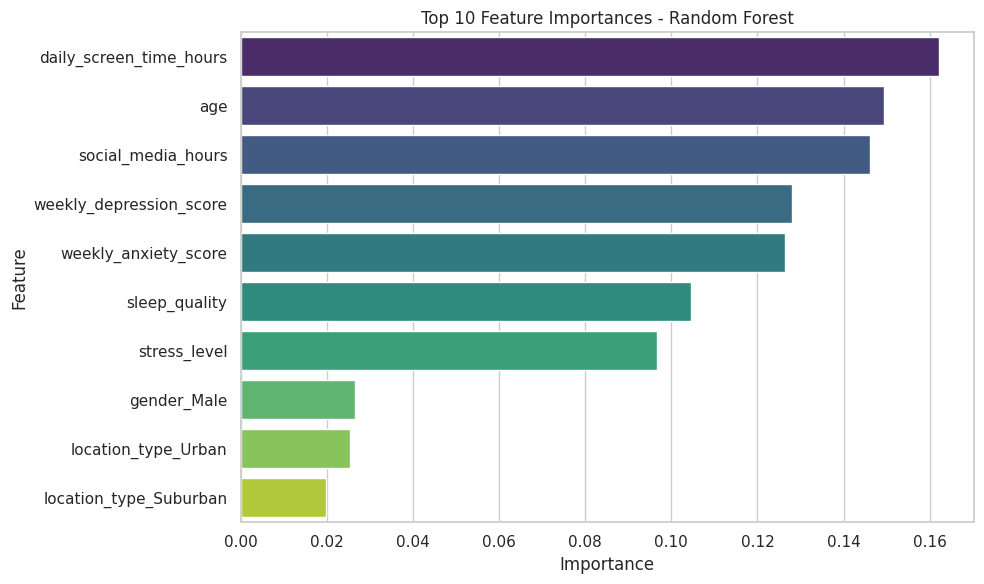

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

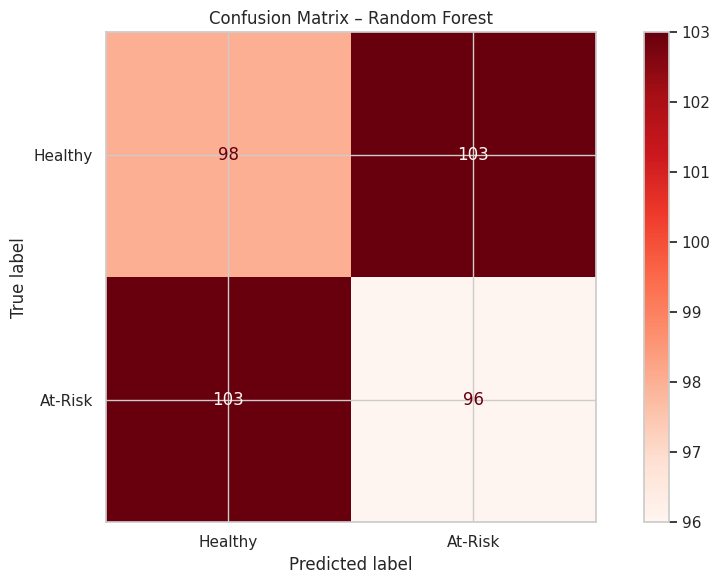

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "At-Risk"])
disp.plot(cmap='Reds')
plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()

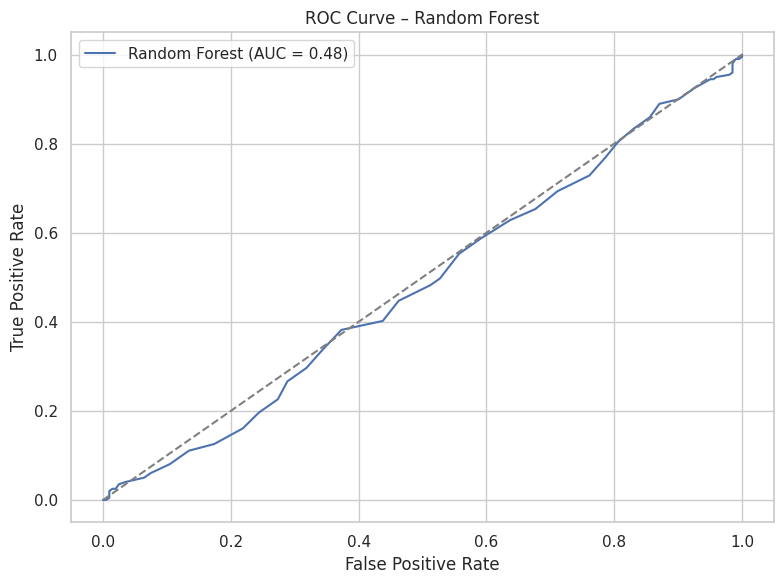

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import shap

# Use TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Check the shape of X_train
print("Shape of X_train:", X_train.shape)

# Check the shape of shap_values for each class
for i in range(len(shap_values)):
    print(f"Class {i} SHAP values shape: {shap_values[i].shape}")

# Ensure that the number of samples in shap_values matches X_train
if shap_values[1].shape[0] == X_train.shape[0]:
    shap.summary_plot(shap_values[1], X_train, feature_names=X.columns)
else:
    print("Mismatch in number of samples between SHAP values and X_train.")

Shape of X_train: (1600, 11)
Class 0 SHAP values shape: (11, 2)
Class 1 SHAP values shape: (11, 2)
Class 2 SHAP values shape: (11, 2)
Class 3 SHAP values shape: (11, 2)
Class 4 SHAP values shape: (11, 2)
Class 5 SHAP values shape: (11, 2)
Class 6 SHAP values shape: (11, 2)
Class 7 SHAP values shape: (11, 2)
Class 8 SHAP values shape: (11, 2)
Class 9 SHAP values shape: (11, 2)
Class 10 SHAP values shape: (11, 2)
Class 11 SHAP values shape: (11, 2)
Class 12 SHAP values shape: (11, 2)
Class 13 SHAP values shape: (11, 2)
Class 14 SHAP values shape: (11, 2)
Class 15 SHAP values shape: (11, 2)
Class 16 SHAP values shape: (11, 2)
Class 17 SHAP values shape: (11, 2)
Class 18 SHAP values shape: (11, 2)
Class 19 SHAP values shape: (11, 2)
Class 20 SHAP values shape: (11, 2)
Class 21 SHAP values shape: (11, 2)
Class 22 SHAP values shape: (11, 2)
Class 23 SHAP values shape: (11, 2)
Class 24 SHAP values shape: (11, 2)
Class 25 SHAP values shape: (11, 2)
Class 26 SHAP values shape: (11, 2)
Class 27 

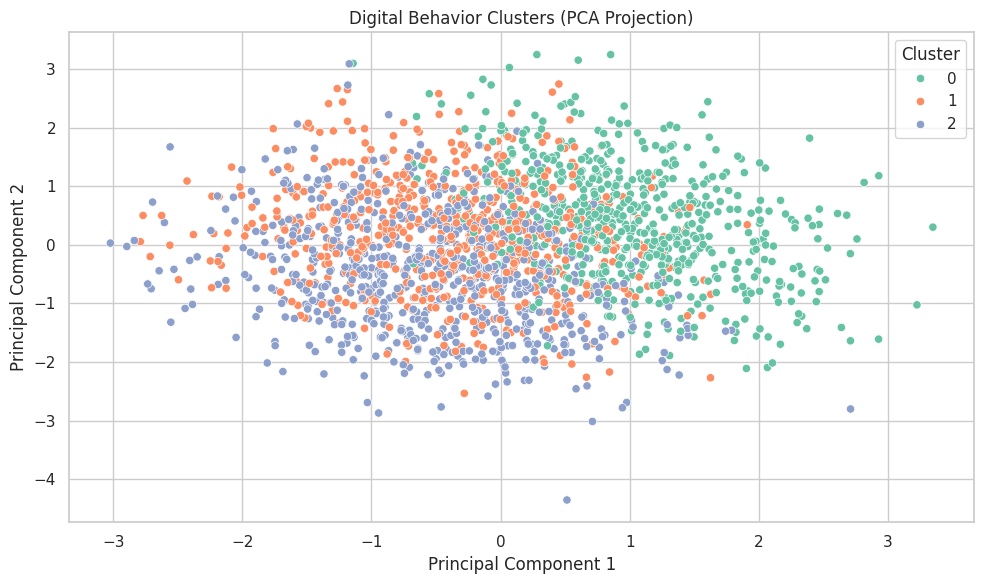

In [ ]:
# Define features for clustering
cluster_features = [
    'daily_screen_time_hours', 'social_media_hours', 'sleep_duration_hours',
    'physical_activity_hours_per_week', 'weekly_depression_score',
    'weekly_anxiety_score', 'stress_level', 'mood_rating'
]

# Preprocess
X_cluster = df[cluster_features]
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

# K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# PCA for 2D projection
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2')
plt.title("Digital Behavior Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_cluster_scaled, df['cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.08


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
   %%writefile streamlit_app.py
   import streamlit as st
   import pandas as pd
   import numpy as np
   import pickle
   import os

   # Load model (assumes you've trained and saved it as .pkl)
   model_path = "mental_health_rf_model.pkl"  # Update this path if necessary
   if os.path.exists(model_path):
       with open(model_path, "rb") as f:
           model = pickle.load(f)
   else:
       st.error("Model file not found. Please check the file path.")
       st.stop()  # Stop the app if the model is not found

   # Title & description
   st.set_page_config(page_title="Digital Diet & Mental Health Classifier", layout="centered")

   st.title("🧠 Digital Diet & Mental Health Risk Predictor")
   st.markdown("""
   This app uses a machine learning model to predict the likelihood of **mental health risk** based on your **digital usage patterns** and **lifestyle habits**.
   Developed by **Hilda Adina Rahmi** — Junior Data Scientist.
   """)

   # Collect user input
   screen_time = st.sidebar.slider("📱 Daily Screen Time (hours)", 0.0, 15.0, 5.0)
   sleep_quality = st.sidebar.slider("😴 Sleep Quality (1 = Poor, 10 = Excellent)", 1, 10, 5)
   social_media = st.sidebar.slider("📲 Social Media Use (hours)", 0.0, 8.0, 2.0)
   depression = st.sidebar.slider("📉 Weekly Depression Score (0–10)", 0.0, 10.0, 4.0)
   anxiety = st.sidebar.slider("😟 Weekly Anxiety Score (0–10)", 0.0, 10.0, 4.0)
   stress = st.sidebar.slider("😰 Stress Level (0–10)", 0.0, 10.0, 5.0)
   age = st.sidebar.slider("🎂 Age", 13, 65, 25)
   gender = st.sidebar.radio("⚧️ Gender", ["Male", "Female"])
   location = st.sidebar.radio("🏡 Living Environment", ["Urban", "Rural"])

   # Prepare input
   input_dict = {
       "daily_screen_time_hours": screen_time,
       "sleep_quality": sleep_quality,
       "social_media_hours": social_media,
       "weekly_depression_score": depression,
       "weekly_anxiety_score": anxiety,
       "stress_level": stress,
       "age": age,
       "gender_Male": 1 if gender == "Male" else 0,
       "location_type_Urban": 1 if location == "Urban" else 0
   }

   input_df = pd.DataFrame([input_dict])

   # Predict
   prediction = model.predict(input_df)[0]
   proba = model.predict_proba(input_df)

   # Display results
   st.subheader("🎯 Prediction Result")
   risk_label = "🟢 Low Risk" if prediction == 0 else "🔴 At-Risk"
   st.markdown(f"### **Mental Health Risk Level: {risk_label}**")

   st.subheader("📈 Risk Probability")
   st.write(f"Low Risk: {proba[0][0]*100:.1f}%")
   st.write(f"High Risk: {proba[0][1]*100:.1f}%")

   with st.expander("📘 How does this work?"):
       st.markdown("""
       The model was trained using a **Random Forest Classifier** on a dataset of 1,000+ individuals.
       It considers behavioral patterns such as:
       - Screen time
       - Social media usage
       - Sleep quality
       - Stress, anxiety, and depression levels
       """)

Overwriting streamlit_app.py


In [ ]:
import pickle

# After training your model
with open("mental_health_rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

In [39]:
import joblib
model = joblib.load("mental_health_rf_model.pkl")

In [42]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

# Check current working directory
print("Current working directory:", os.getcwd())

# Load model
model_path = "mental_health_rf_model.pkl"  # Update this path if necessary
print("Model path:", os.path.abspath(model_path))

if os.path.exists(model_path):
    model = joblib.load(model_path)  # Use joblib if applicable
else:
    st.error("Model file not found. Please check the file path.")
    st.stop()  # Stop the app if the model is not found

# Rest of your Streamlit app code...

Current working directory: /content
Model path: /content/mental_health_rf_model.pkl


In [44]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import os

# Load model (assumes you've trained and saved it as .pkl)
model_path = "mental_health_rf_model.pkl"  # Ensure this path is correct

# Check if the model file exists
if os.path.exists(model_path):
    with open(model_path, "rb") as f:
        model = pickle.load(f)
else:
    st.error("Model file not found. Please check the file path.")
    st.stop()  # Stop the app if the model is not found

# Title & description
st.set_page_config(page_title="Digital Diet & Mental Health Classifier", layout="centered")

st.title("🧠 Digital Diet & Mental Health Risk Predictor")
st.markdown("""
This app uses a machine learning model to predict the likelihood of **mental health risk** based on your **digital usage patterns** and **lifestyle habits**.
Developed by **Hilda Adina Rahmi** — Junior Data Scientist.
""")

# Collect user input
screen_time = st.sidebar.slider("📱 Daily Screen Time (hours)", 0.0, 15.0, 5.0)
sleep_quality = st.sidebar.slider("😴 Sleep Quality (1 = Poor, 10 = Excellent)", 1, 10, 5)
social_media = st.sidebar.slider("📲 Social Media Use (hours)", 0.0, 8.0, 2.0)
depression = st.sidebar.slider("📉 Weekly Depression Score (0–10)", 0.0, 10.0, 4.0)
anxiety = st.sidebar.slider("😟 Weekly Anxiety Score (0–10)", 0.0, 10.0, 4.0)
stress = st.sidebar.slider("😰 Stress Level (0–10)", 0.0, 10.0, 5.0)
age = st.sidebar.slider("🎂 Age", 13, 65, 25)
gender = st.sidebar.radio("⚧️ Gender", ["Male", "Female"])
location = st.sidebar.radio("🏡 Living Environment", ["Urban", "Rural"])

# Prepare input for prediction
input_dict = {
    "daily_screen_time_hours": screen_time,
    "sleep_quality": sleep_quality,
    "social_media_hours": social_media,
    "weekly_depression_score": depression,
    "weekly_anxiety_score": anxiety,
    "stress_level": stress,
    "age": age,
    "gender_Male": 1 if gender == "Male" else 0,
    "location_type_Urban": 1 if location == "Urban" else 0
}

input_df = pd.DataFrame([input_dict])

# Initialize prediction variable
prediction = None
proba = None

# Predict
try:
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)
except Exception as e:
    st.error(f"An error occurred during prediction: {e}")
    st.stop()

# Display results
if prediction is not None:
    st.subheader("🎯 Prediction Result")
    risk_label = "🟢 Low Risk" if prediction == 0 else "🔴 At-Risk"
    st.markdown(f"### **Mental Health Risk Level: {risk_label}**")

    st.subheader("📈 Risk Probability")
    st.write(f"Low Risk: {proba[0][0] * 100:.1f}%")
    st.write(f"High Risk: {proba[0][1] * 100:.1f}%")

    # Explanation of the model
    with st.expander("📘 How does this work?"):
        st.markdown("""
        The model was trained using a **Random Forest Classifier** on a dataset of 1,000+ individuals.
    It considers behavioral patterns such as:
    - Screen time
    - Social media usage
    - Sleep quality
    - Stress, anxiety, and depression levels
    """)

2025-05-07 08:39:40.467 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 08:39:40.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 08:39:40.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 08:39:40.471 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 08:39:40.472 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 08:39:40.473 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 08:39:40.474 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 08:39:40.477 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [46]:
!streamlit run streamlit_app.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.194.158.175:8501

  Stopping...


In [53]:
import joblib

model = joblib.load("mental_health_rf_model.pkl")
print(model.get_params())  # atau cari di dokumentasi kode training


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [54]:
# Prepare input for prediction
input_dict = {
    "daily_screen_time_hours": screen_time,
    "sleep_quality": sleep_quality,
    "social_media_hours": social_media,
    "weekly_depression_score": depression,
    "weekly_anxiety_score": anxiety,
    "stress_level": stress,
    "age": age,
    "gender_Male": 1 if gender == "Male" else 0,
    "location_type_Urban": 1 if location == "Urban" else 0
}

input_df = pd.DataFrame([input_dict])

# Debugging: Print the input DataFrame
print("Input DataFrame for prediction:")
print(input_df)

# Predict
try:
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)
except Exception as e:
    st.error(f"An error occurred during prediction: {e}")
    st.stop()


2025-05-07 09:06:40.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:06:40.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:06:40.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Input DataFrame for prediction:
   daily_screen_time_hours  sleep_quality  social_media_hours  \
0                      5.0              5                 2.0   

   weekly_depression_score  weekly_anxiety_score  stress_level  age  \
0                      4.0                   4.0           5.0   25   

   gender_Male  location_type_Urban  
0            1                    1  


In [57]:
import pandas as pd

# Load your training data (update the path as necessary)
training_data = pd.read_csv('digital_diet_mental_health.csv')

# Check the columns of the training data
print("Training data features:")
print(training_data.columns)

# Check the shape of the input DataFrame
print("Input DataFrame shape for prediction:")
print(input_df.shape)


Training data features:
Index(['user_id', 'age', 'gender', 'daily_screen_time_hours',
       'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours',
       'tv_usage_hours', 'social_media_hours', 'work_related_hours',
       'entertainment_hours', 'gaming_hours', 'sleep_duration_hours',
       'sleep_quality', 'mood_rating', 'stress_level',
       'physical_activity_hours_per_week', 'location_type',
       'mental_health_score', 'uses_wellness_apps', 'eats_healthy',
       'caffeine_intake_mg_per_day', 'weekly_anxiety_score',
       'weekly_depression_score', 'mindfulness_minutes_per_day'],
      dtype='object')
Input DataFrame shape for prediction:
(1, 9)


In [61]:
import streamlit as st

# Collect user inputs
age = st.sidebar.slider("🎂 Age", 13, 65, 25)
gender = st.sidebar.selectbox("⚧️ Gender", ["Male", "Female"])
daily_screen_time = st.sidebar.slider("📱 Daily Screen Time (hours)", 0.0, 15.0, 5.0)
phone_usage = st.sidebar.slider("📱 Phone Usage (hours)", 0.0, 15.0, 2.0)
laptop_usage = st.sidebar.slider("💻 Laptop Usage (hours)", 0.0, 15.0, 2.0)
tablet_usage = st.sidebar.slider("📱 Tablet Usage (hours)", 0.0, 15.0, 2.0)
tv_usage = st.sidebar.slider("📺 TV Usage (hours)", 0.0, 15.0, 2.0)
social_media = st.sidebar.slider("📲 Social Media Use (hours)", 0.0, 8.0, 2.0)
work_related_hours = st.sidebar.slider("🧑‍💻 Work Related Hours (hours)", 0.0, 15.0, 2.0)
entertainment_hours = st.sidebar.slider("🎉 Entertainment Hours (hours)", 0.0, 15.0, 2.0)
gaming_hours = st.sidebar.slider("🎮 Gaming Hours (hours)", 0.0, 15.0, 2.0)
sleep_duration = st.sidebar.slider("😴 Sleep Duration (hours)", 0.0, 15.0, 7.0)
sleep_quality = st.sidebar.slider("😴 Sleep Quality (1 = Poor, 10 = Excellent)", 1, 10, 5)
mood_rating = st.sidebar.slider("😊 Mood Rating (1 = Poor, 10 = Excellent)", 1, 10, 5)
stress_level = st.sidebar.slider("😟 Stress Level (0–10)", 0, 10, 5)
physical_activity = st.sidebar.slider("🏃 Physical Activity (hours/week)", 0, 20, 3)
uses_wellness_apps = st.sidebar.radio("🧘 Uses Wellness Apps?", ["Yes", "No"])
eats_healthy = st.sidebar.radio("🥗 Eats Healthy?", ["Yes", "No"])
caffeine_intake = st.sidebar.number_input("☕ Caffeine Intake (mg/day)", 0, 1000, 200)
mindfulness_minutes = st.sidebar.slider("🧘 Mindfulness Minutes (per day)", 0, 120, 30)

# Prepare input for prediction
input_dict = {
    "daily_screen_time_hours": daily_screen_time,
    "phone_usage_hours": phone_usage,
    "laptop_usage_hours": laptop_usage,
    "tablet_usage_hours": tablet_usage,
    "tv_usage_hours": tv_usage,
    "social_media_hours": social_media,
    "work_related_hours": work_related_hours,
    "entertainment_hours": entertainment_hours,
    "gaming_hours": gaming_hours,
    "sleep_duration_hours": sleep_duration,
    "sleep_quality": sleep_quality,
    "mood_rating": mood_rating,
    "stress_level": stress_level,
    "physical_activity_hours_per_week": physical_activity,
    "age": age,
    "gender": gender,
    "uses_wellness_apps": 1 if uses_wellness_apps == "Yes" else 0,
    "eats_healthy": 1 if eats_healthy == "Yes" else 0,
    "caffeine_intake_mg_per_day": caffeine_intake,
    "mindfulness_minutes_per_day": mindfulness_minutes,
}

# Convert to DataFrame
input_df = pd.DataFrame([input_dict])

# Debugging: Print the input DataFrame
print("Input DataFrame for prediction:")
print(input_df)

# Predict (assuming you have a trained model)
try:
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)
except Exception as e:
    st.error(f"An error occurred during prediction: {e}")
    st.stop()
    # Assuming you have a trained model loaded as 'model'
try:
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)

    # Display the prediction result
    st.write("### Prediction Result:")
    st.write(f"The predicted mental health impact score is: {prediction}")
    st.write(f"Prediction probabilities: {proba}")

except Exception as e:
    st.error(f"An error occurred during prediction: {e}")



2025-05-07 09:12:39.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:12:39.386 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:12:39.387 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:12:39.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:12:39.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:12:39.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:12:39.390 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:12:39.391 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Input DataFrame for prediction:
   daily_screen_time_hours  phone_usage_hours  laptop_usage_hours  \
0                      5.0                2.0                 2.0   

   tablet_usage_hours  tv_usage_hours  social_media_hours  work_related_hours  \
0                 2.0             2.0                 2.0                 2.0   

   entertainment_hours  gaming_hours  sleep_duration_hours  sleep_quality  \
0                  2.0           2.0                   7.0              5   

   mood_rating  stress_level  physical_activity_hours_per_week  age gender  \
0            5             5                                 3   25   Male   

   uses_wellness_apps  eats_healthy  caffeine_intake_mg_per_day  \
0                   1             1                         200   

   mindfulness_minutes_per_day  
0                           30  


In [64]:
import streamlit as st
import pandas as pd
import joblib  # or any other method you used to load your model

# Load your trained model (update the path as necessary)
model = joblib.load('mental_health_rf_model.pkl')

# Collect user inputs (as previously defined)
# ...

# Prepare input for prediction
input_dict = {
    "daily_screen_time_hours": daily_screen_time,
    "phone_usage_hours": phone_usage,
    "laptop_usage_hours": laptop_usage,
    "tablet_usage_hours": tablet_usage,
    "tv_usage_hours": tv_usage,
    "social_media_hours": social_media,
    "work_related_hours": work_related_hours,
    "entertainment_hours": entertainment_hours,
    "gaming_hours": gaming_hours,
    "sleep_duration_hours": sleep_duration,
    "sleep_quality": sleep_quality,
    "mood_rating": mood_rating,
    "stress_level": stress_level,
    "physical_activity_hours_per_week": physical_activity,
    "age": age,
    "gender": gender,
    "uses_wellness_apps": 1 if uses_wellness_apps == "Yes" else 0,
    "eats_healthy": 1 if eats_healthy == "Yes" else 0,
    "caffeine_intake_mg_per_day": caffeine_intake,
    "mindfulness_minutes_per_day": mindfulness_minutes,
}

# Convert to DataFrame
input_df = pd.DataFrame([input_dict])

# Debugging: Print the input DataFrame
print("Input DataFrame for prediction:")
print(input_df)

# Predict
try:
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)

    # Display the prediction result
    st.write("### Prediction Result:")
    st.write(f"The predicted mental health impact score is: {prediction}")
    st.write(f"Prediction probabilities: {proba}")

except Exception as e:
    st.error(f"An error occurred during prediction: {e}")


2025-05-07 09:14:40.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-07 09:14:40.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Input DataFrame for prediction:
   daily_screen_time_hours  phone_usage_hours  laptop_usage_hours  \
0                      5.0                2.0                 2.0   

   tablet_usage_hours  tv_usage_hours  social_media_hours  work_related_hours  \
0                 2.0             2.0                 2.0                 2.0   

   entertainment_hours  gaming_hours  sleep_duration_hours  sleep_quality  \
0                  2.0           2.0                   7.0              5   

   mood_rating  stress_level  physical_activity_hours_per_week  age gender  \
0            5             5                                 3   25   Male   

   uses_wellness_apps  eats_healthy  caffeine_intake_mg_per_day  \
0                   1             1                         200   

   mindfulness_minutes_per_day  
0                           30  
